### My Submetric: 311 calls per Neighborhood

#### Goal 

The goal here is to figure out which neighborhood in Pittsburgh is the best by using the amount of 311 call made in each neighborhood. We do this by using the dataset found on WPRDC

#### Why use 311 calls?
We are using 311 calls because these calls are typically used for non-emergency issues and to request city services. By figuring out which neighborhood has the least amount of 311 calls, we can assume that the neighborhood has less to complain about which can deem it better than the other neighborhoods. Basically, fewer 311 calls means a better neighborhood quality.

### Step 1
We need to import our dataset that we found on WPRDC. Here we can see the entire dataset and see what type of information it contains. 

In [1]:
import pandas as pd 

ds = pd.read_csv("calls.csv")
ds.head()

,_id,group_id,num_requests,parent_closed,status_name,status_code,dept,request_type_name,request_type_id,create_date_et,...,cross_street_id,city,neighborhood,census_tract,council_district,ward,police_zone,latitude,longitude,geo_accuracy
0,1,827262,1,f,open,0,DPW - Administration,Park Shelter,543,2024-03-12T10:50:00,...,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES
1,2,720661,1,f,open,0,DPW - Administration,Park Shelter,543,2023-03-20T07:52:00,...,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES
2,3,722010,1,f,open,0,DPW - Administration,Park Shelter,543,2023-03-24T07:44:00,...,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES
3,4,846915,1,f,open,0,Police - Zones 1-6,Illegal Parking,417,2024-05-19T12:24:00,...,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES
4,5,853708,1,f,open,0,DPW - Facilities,City Facility,375,2024-06-06T23:04:00,...,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES


### Step 2
Our main focus is the columns in the dataset. Here we can display all the columns in the dataset. We will analyis this and pick out which columns we need.

In [7]:
ds.columns
ds.head()

,_id,group_id,num_requests,parent_closed,status_name,...,ward,police_zone,latitude,longitude,geo_accuracy
96,97,626501,1,f,open,...,2.0,2.0,40.443452,-80.004199,APPROXIMATE
196,197,432038,1,f,in progress,...,11.0,5.0,40.479870,-79.916472,EXACT
309,310,577909,1,f,in progress,...,11.0,5.0,40.479870,-79.916472,EXACT
375,376,620792,1,f,open,...,11.0,5.0,40.482654,-79.916638,APPROXIMATE
529,530,320982,1,f,open,...,20.0,6.0,40.448080,-80.040519,APPROXIMATE


### Step 3
After figuring out which columns we need, we want to clear up any unneccessary data from this. We can remove any data that doesn't include the name of a neighborhood. We do this so we can get an accurate verison of the data to later rank.

In [18]:
ds = ds.dropna(subset=['neighborhood'])
ds = ds[ds['neighborhood'] != 'Mount Oliver Borough']

We remove rows with missing neighborhoods because those entries cannot be used to count neighborhood-level 311 calls.
We also remove "Mount Oliver Borough" because it is not officially part of the City of Pittsburgh.

### Step 4
Now that we have the cleaned dataset with the columns we need, we can move on to grouping the data by neighborhood. By grouping the dataset by the “neighborhood” column, we can count how many 311 calls come from each neighborhood. This gives us the metric we will use to compare neighborhoods total 311 calls.

In [11]:
calls_per_neighborhood = (
    ds.groupby('neighborhood')
      .size()
      .reset_index(name='call_count')
      .sort_values(by='call_count', ascending=True)
)

calls_per_neighborhood.head()

,neighborhood,call_count
4,Arlington Heights,167
35,Glen Hazel,477
57,Northview Heights,836
66,Ridgemont,909
26,East Carnegie,950


### Step 5
Now that we have the call counts for each neighborhood, we can rank them based on the total number of 311 calls placed. Each neighborhood is assigned a rank from 1 to 90, where a lower rank indicates a "better" neighborhood (fewer calls).
Ranking makes it easier to visualize the data and allows us to use this metric to compare neighborhoods more effectively.

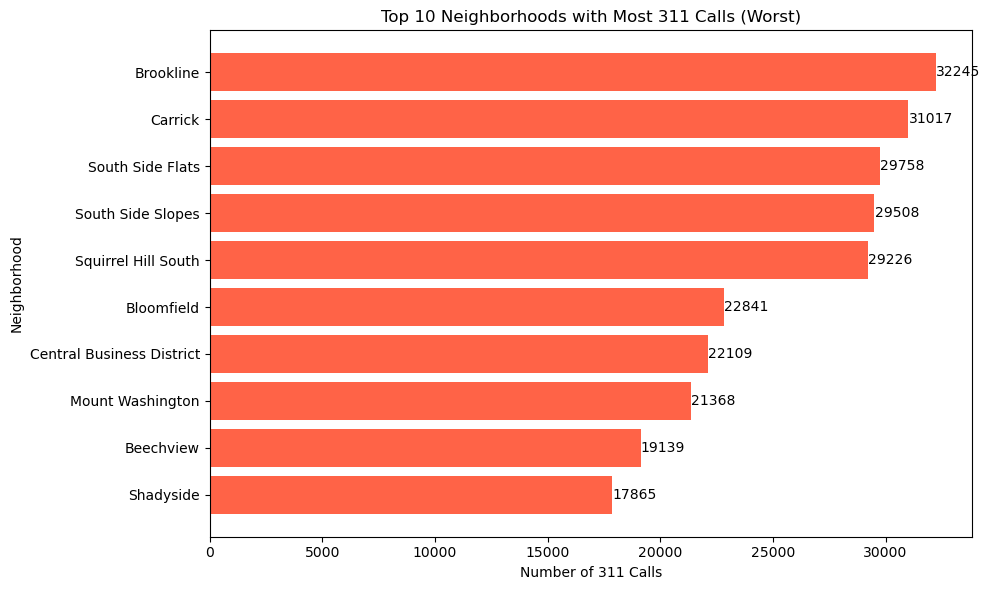

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

ds = pd.read_csv("calls.csv")
ds = ds.dropna(subset=['neighborhood'])
ds = ds[ds['neighborhood'] != 'Mount Oliver Borough']

calls_per_neighborhood = (
    ds.groupby('neighborhood')
      .size()
      .reset_index(name='call_count')
      .sort_values(by='call_count', ascending=False)
)

top10_worst = calls_per_neighborhood.nlargest(10, 'call_count')
top10_worst = top10_worst.sort_values(by='call_count', ascending=True)

plt.figure(figsize=(10,6))
plt.barh(top10_worst['neighborhood'], top10_worst['call_count'], color='tomato')
plt.xlabel("Number of 311 Calls")
plt.ylabel("Neighborhood")
plt.title("Top 10 Neighborhoods with Most 311 Calls (Worst)")

for index, value in enumerate(top10_worst['call_count']):
    plt.text(value + 2, index, str(value), va='center')

plt.tight_layout()
plt.show()

## Our Findings
Now that we have our data sorted, we move on to ranking our neighborhoods from Best to Worst.

In [17]:
import pandas as pd

ds = pd.read_csv("calls.csv")
ds = ds.dropna(subset=['neighborhood'])
ds = ds[ds['neighborhood'] != 'Mount Oliver Borough']

calls_per_neighborhood = (
    ds.groupby('neighborhood')
      .size()
      .reset_index(name='call_count')
)

calls_per_neighborhood['rank'] = calls_per_neighborhood['call_count'].rank(method='min', ascending=True)
calls_per_neighborhood = calls_per_neighborhood.sort_values(by='rank')
calls_per_neighborhood = calls_per_neighborhood.reset_index(drop=True)
calls_per_neighborhood.index += 1

print(calls_per_neighborhood[['rank', 'neighborhood', 'call_count']])

    rank               neighborhood  call_count
1    1.0          Arlington Heights         167
2    2.0                 Glen Hazel         477
3    3.0          Northview Heights         836
4    4.0                  Ridgemont         909
5    5.0              East Carnegie         950
6    6.0                  St. Clair        1032
7    7.0             Chartiers City        1125
8    8.0                  Fairywood        1172
9    9.0                South Shore        1343
10  10.0                     Esplen        1496
11  11.0                       Hays        1541
12  12.0                    Oakwood        1568
13  13.0                    Chateau        1743
14  14.0             Allegheny West        1754
15  15.0          Bedford Dwellings        1906
16  16.0                   West End        2024
17  17.0              New Homestead        2069
18  18.0              Regent Square        2179
19  19.0            Terrace Village        2256
20  20.0                    Bon Air     

What we get is a full ranking of the neighborhood based on my submetric.

#### Top 10 Best and Worst Neighborhoods

In [20]:
top10_best = calls_per_neighborhood.nsmallest(10, 'call_count')
top10_worst = calls_per_neighborhood.nlargest(10, 'call_count')

print("Top 10 Best Neighborhoods:\n", top10_best[['rank','neighborhood','call_count']])
print("\nTop 10 Worst Neighborhoods:\n", top10_worst[['rank','neighborhood','call_count']])

Top 10 Best Neighborhoods:
     rank       neighborhood  call_count
1    1.0  Arlington Heights         167
2    2.0         Glen Hazel         477
3    3.0  Northview Heights         836
4    4.0          Ridgemont         909
5    5.0      East Carnegie         950
6    6.0          St. Clair        1032
7    7.0     Chartiers City        1125
8    8.0          Fairywood        1172
9    9.0        South Shore        1343
10  10.0             Esplen        1496

Top 10 Worst Neighborhoods:
     rank               neighborhood  call_count
90  90.0                  Brookline       32245
89  89.0                    Carrick       31017
88  88.0           South Side Flats       29758
87  87.0          South Side Slopes       29508
86  86.0        Squirrel Hill South       29226
85  85.0                 Bloomfield       22841
84  84.0  Central Business District       22109
83  83.0           Mount Washington       21368
82  82.0                  Beechview       19139
81  81.0              